---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    # importing fraud data
    df = pd.read_csv('readonly/fraud_data.csv')

    # returning fraud percentages
    return (df.Class.sum()/df.shape[0])

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # training dummy classifier
    dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)

    # creating predictions using dummy classifier model
    y_dummy_predictions = dummy_majority.predict(X_test)

    # evaluation1: scoring model accuracy on test set
    accuracy_score = dummy_majority.score(X_test, y_test)

    # evaluation2: model recall on test target vs. prediction
    recall_score = recall_score(y_test, y_dummy_predictions)

    return (accuracy_score, recall_score)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # training support vector classifier with default parameters
    svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)

    # creating predictions using support vector model
    svm_predicted = svm.predict(X_test)

    # evaluation1: scoring model accuracy on test set
    accuracy_score = svm.score(X_test, y_test)

    # evaluation2: model recall on test target vs. prediction
    recall_score = recall_score(y_test, svm_predicted)

    # evaluation3: model precision on test target vs. prediction
    precision_score = precision_score(y_test, svm_predicted)

    return (accuracy_score, recall_score, precision_score)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # training support vector classifier with custom parameters
    svm = SVC(kernel='rbf', C=1e9, gamma=1e-07).fit(X_train, y_train)

    # creating predictions using support vector model
    svm_predicted = svm.predict(X_test)

    # setting threshold
    svm_predicted_thres = svm_predicted > -220

    # evaluation: confusion matrix
    confusion = confusion_matrix(y_test, svm_predicted_thres)

    return confusion

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

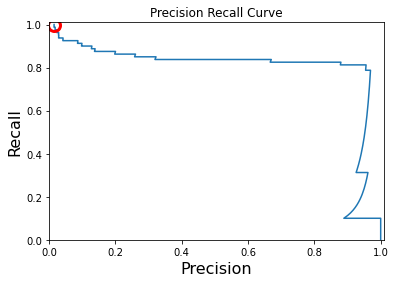

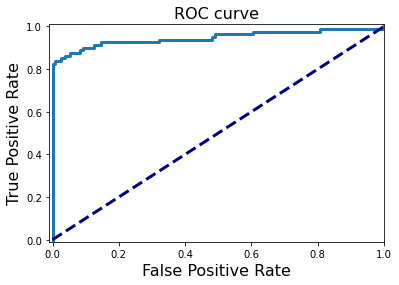

(0.827, 0.926)

In [7]:
def answer_five():
        
    # from sklearn.metrics import confusion_matrix
    from sklearn.linear_model import LogisticRegression

    # fitting a logistic regression model
    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)

    # probability estimates for fraud
    y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)

    # prt 1: creating a precision recall curve
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr[:,1])
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label = 'Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.title("Precision Recall Curve")
    plt.xlabel('Precision', fontsize = 16)
    plt.ylabel('Recall', fontsize = 16)
    plt.show()

    # part 2: roc curve
    from sklearn.metrics import roc_curve

    # roc curve using y test, and probability estimates
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr[:,1])

    # plotting figure
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    plt.show()

    # precision = 0.75 corresponds to recall of 0.827
    recall = 0.827

    # true positive rate = 0.926 when false positive rate = 0.16
    true_positive_rate = 0.926

    return (recall, true_positive_rate)

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [9]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # declaring a logistic regression model
    clf = LogisticRegression()

    # range of candidate penalty
    penalty = ['l1', 'l2']

    # range of regularization
    C = np.logspace(-2, 2, 5)

    # dictionary of hyperparameter
    param_grid = dict(C=C, penalty=penalty)

    # using recall for scoring 
    # grid search: 3 fold cross validation
    grid_clf_rec = GridSearchCV(clf, param_grid, cv = 3, scoring='recall')

    # fitting grid search
    grid_clf_rec.fit(X_train, y_train)

    # scoring fitted model
    y_decision_fn_scores_rec = grid_clf_rec.decision_function(X_test)

    # storing results to dictionary
    my_dict = grid_clf_rec.cv_results_

    # converting dictionary to dataframe
    df = pd.DataFrame.from_dict(my_dict)

    # subsetting relevant columns
    df = df[['param_C', 'param_penalty', 'mean_test_score']]

    # filling na for reshaping
    df['mean_test_score'] = df['mean_test_score'].fillna(0)

    # reshaping data long to wide
    df_w = df.pivot_table(index=["param_C"], columns = 'param_penalty',
                            values = 'mean_test_score').reset_index()

    # replacing original nan's in l1 column
    df_w['l1'].replace(0, np.nan, inplace=True)

    # storing scores to 5x2 array
    scores_array = df_w[['l1', 'l2']].to_numpy()
    
    return scores_array

answer_six()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([[       nan, 0.79347826],
       [       nan, 0.80072464],
       [       nan, 0.78985507],
       [       nan, 0.80072464],
       [       nan, 0.79710145]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

<IPython.core.display.Javascript object>


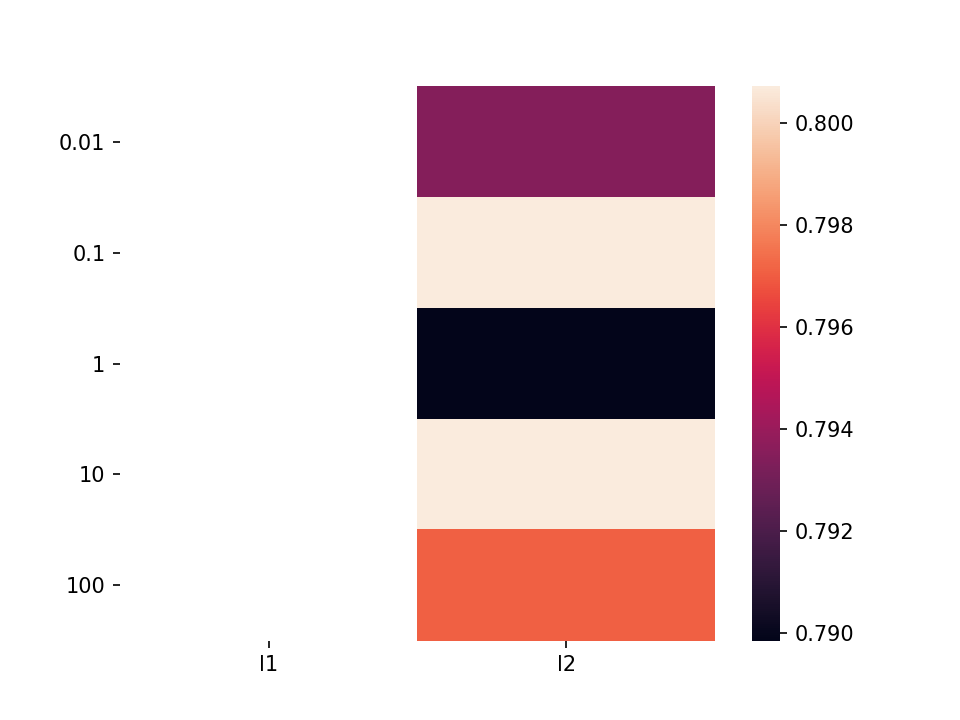

In [11]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())